## Importing the dependencies

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import tkinter as tk
import tkinter.ttk as ttk
import tkinter.font as font

## Preparing the data

In [3]:
data = pd.read_csv('./datasets/online_retail.csv') # Loading the data

In [4]:
data.head() # Get a glimpse of the data

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


#### Getting some information on the data

In [5]:
print(f'Number of rows: {len(data)}')

Number of rows: 541909


That's a ton of data right there

In [6]:
print(f'Number of columns: {len(data.columns)}')

Number of columns: 9


In [7]:
data.columns

Index(['index', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

Now let's see the description of each columns

In [8]:
data.describe()

,index,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000,406829.000000
mean,270954.000000,9.552250,4.611114,15287.690570
std,156435.797851,218.081158,96.759853,1713.600303
min,0.000000,-80995.000000,-11062.060000,12346.000000
25%,135477.000000,1.000000,1.250000,13953.000000
50%,270954.000000,3.000000,2.080000,15152.000000
75%,406431.000000,10.000000,4.130000,16791.000000
max,541908.000000,80995.000000,38970.000000,18287.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


#### Checking the 'object'-typed columns

In [10]:
data.select_dtypes('object')

,InvoiceNo,StockCode,Description,InvoiceDate,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,12/1/2010 8:26,United Kingdom
1,536365,71053,WHITE METAL LANTERN,12/1/2010 8:26,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,12/1/2010 8:26,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,12/1/2010 8:26,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,12/1/2010 8:26,United Kingdom
...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12/9/2011 12:50,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,12/9/2011 12:50,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,12/9/2011 12:50,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,12/9/2011 12:50,France


we can use some columns here: 
- `InvoiceDate`: We'll convert this into a numeric values
- `Country`(Maybe): If this column contains categorical values then we can convert it into a labeled values 

Let's check the `InvoiceNo`

In [11]:
data['InvoiceNo']

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
541904    581587
541905    581587
541906    581587
541907    581587
541908    581587
Name: InvoiceNo, Length: 541909, dtype: object

In [12]:
data['InvoiceNo'].unique()

array(['536365', '536366', '536367', ..., '581585', '581586', '581587'],
      dtype=object)

We ain't using that. Let's just clear the unncessary columns right away. But let's store the newly made DataFrame in a new variable to make sure that we can use the original data again in the testing part

In [13]:
cleaned_data = data.copy()

In [14]:
cleaned_data = cleaned_data.drop(['InvoiceNo', 'StockCode', 'Description'], axis=1)

Now let's check the `Country` column

In [15]:
cleaned_data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

It seems like we cannot use this column too, because it has so many variants. let's just drop it

In [16]:
cleaned_data = cleaned_data.drop(['Country'], axis=1)

Let's now check on the `InvoiceDate` column. Let's try converting it into a datetime values

In [17]:
pd.to_datetime(cleaned_data['InvoiceDate'])

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

In [18]:
cleaned_data['InvoiceDate'] = pd.to_datetime(cleaned_data['InvoiceDate']) # Setting the `InvoiceDate` to a datetime values

#### Checking missing values and outliers

In [19]:
cleaned_data.isna().sum()

index               0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

Let's just drop the `CustomerID` since we won't use it anyways

In [20]:
cleaned_data = cleaned_data.drop(['CustomerID'], axis=1)

In [21]:
cleaned_data.head()

,index,Quantity,InvoiceDate,UnitPrice
0,0,6,2010-12-01 08:26:00,2.55
1,1,6,2010-12-01 08:26:00,3.39
2,2,8,2010-12-01 08:26:00,2.75
3,3,6,2010-12-01 08:26:00,3.39
4,4,6,2010-12-01 08:26:00,3.39


After that, let's check the outliers. We will be using the z-score method to check the outliers in the data. The way this method works is by calculating the z-score of a certain data points then check if the z-score surpass the threshold, if yes then we consider them as the outliers

In [22]:
def get_outliers_indices(col: pd.DataFrame, threshold=3):
    X = col.to_numpy()
    
    # Compute the coefficients
    mean_X = np.mean(X)
    std_X = np.std(X)
    
    # Calculate the z-scores
    z_scores = (X - mean_X) / std_X
    
    # Getting the indices by checking if the z-score is less than -threshold or greater than threshold
    indices = np.nonzero(np.abs(z_scores) > threshold)
    
    return indices

Let's iterate through each columns to check for the outliers in each columns

In [23]:
# for col in cleaned_data:
#     outliers_indices = get_outliers_indices(data[col])
#     print(f'There are {len(outliers_indices)} outliers in {col}')

#### Checking for the duplicated data

In [24]:
cleaned_data[cleaned_data.duplicated()]

,index,Quantity,InvoiceDate,UnitPrice


Since there are no duplicated data, we don't need to remove any

## Preprocessing the data

Since there are no missing values, duplicated data, and we do not need to remove the outliers (because we will eventually use it in the clustering), we only need to convert the datetime into a numeric values, after that we will scale the data, then we will jump right into the Dimensionality Reduction process

In [25]:
# Convert the InvoiceDate into DaysSinceInvoice which is a numeric values
cleaned_data['DaysSinceInvoice'] = (dt.datetime.now() - cleaned_data['InvoiceDate']).dt.days

Let's drop the `InvoiceDate`

In [26]:
cleaned_data = cleaned_data.drop(['InvoiceDate'], axis=1)

Let's now scale the data

In [27]:
def standard_scaler(data: pd.DataFrame):
    X = data.to_numpy()
    mean_X = np.mean(X)
    var_X = np.var(X)
    
    scaled_values = (X - mean_X) / var_X
    
    return scaled_values

In [28]:
scaled_values = standard_scaler(cleaned_data) # Scale the data to standardize

In [29]:
scaled_data = pd.DataFrame(scaled_values, columns=cleaned_data.columns) # Turn the values into a DataFrame
scaled_data.head()

,index,Quantity,UnitPrice,DaysSinceInvoice
0,-0.000003,-0.000003,-0.000003,-0.000003
1,-0.000003,-0.000003,-0.000003,-0.000003
2,-0.000003,-0.000003,-0.000003,-0.000003
3,-0.000003,-0.000003,-0.000003,-0.000003
4,-0.000003,-0.000003,-0.000003,-0.000003


Now let's apply the PCA method to reduce the dimensions

In [30]:
def apply_pca(data: pd.DataFrame, n_features=2):
    X = data.to_numpy()
    mean_X = np.mean(X, axis=0)
    
    # Find the centered X
    X_center: np.ndarray = X - mean_X
    
    # Compute the covariance matrix
    cov = np.cov(X_center.T)
    
    # Compute the eigenvalues and eigenvector
    eigenvalues, eigenvector = np.linalg.eig(cov)
    
    # Transpose the eigenvector
    eigenvector = eigenvector.T
    # Find the reveresed sorted indices
    indices = np.argsort(eigenvalues)[::-1]
    # Reorder the eigenvector
    eigenvector = eigenvector[indices]
    
    # Slice the features we will be using
    features = eigenvector[:n_features]
    
    return np.dot(X_center, features.T)

In [31]:
# Reduce the data dimensions to 2
reduced_dim_values = apply_pca(scaled_data, 2)

In [32]:
# Convert it into a DataFrame
reduced_dim_data = pd.DataFrame(reduced_dim_values, columns=['Col1','Col2'])

In [33]:
reduced_dim_data.head()

,Col1,Col2
0,-0.000014,-1.780671e-10
1,-0.000014,-1.780962e-10
2,-0.000014,-7.670976e-11
3,-0.000014,-1.780962e-10
4,-0.000014,-1.780962e-10


## Data Modelling

Before we make the model, we will first make the variable `X` to define features to use in the model

In [34]:
X = reduced_dim_data.to_numpy()

In [35]:
X

array([[-1.37325381e-05, -1.78067103e-10],
       [-1.37324874e-05, -1.78096156e-10],
       [-1.37324368e-05, -7.67097610e-11],
       ...,
       [ 1.37324346e-05, -2.84085723e-10],
       [ 1.37324853e-05, -2.84085741e-10],
       [ 1.37325360e-05, -3.34795556e-10]])

Let's try plotting the data

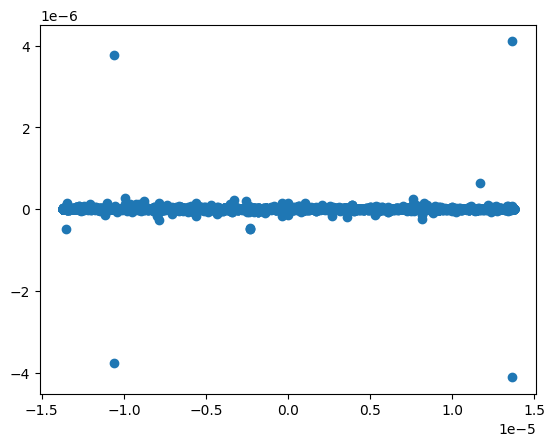

In [36]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

Let's first make the visualization utility function first

In [37]:
def plot_cluster(X: np.ndarray, centroids: np.ndarray, labels: np.ndarray):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X')
    plt.show()

Now let's actually make the model

In [43]:
class KMeans:
    def __init__(self, k, max_iters=300) -> None:
        self.k = k
        self.max_iters = max_iters
        self._centroids = None
        self._labels = None
        self._inertia = None
    
    def _assign_labels(self, X: np.ndarray, centroids: np.ndarray):
        # Calculate the distances using the euclidean distance formula
        distances = np.sqrt((X - centroids[:, np.newaxis]) ** 2).sum(axis=2)
        # Return the shortest distances and assign it to data points
        return np.argmin(distances, axis=0)
    
    def _update_centroids(self, X: np.ndarray, labels: np.ndarray):
        centroids = np.zeros((self.k, X.shape[1]))
        
        for i in range(self.k):
            cluster_points = X[labels == i]
            centroids[i] = np.mean(cluster_points, axis=0)
            
        return centroids
    
    def _calc_inertia(self, X: np.ndarray, centroids: np.ndarray, labels: np.ndarray):
        inertia = 0
        
        for i in range(self.k):
            cluster_points = X[labels == i]
            inertia += np.sum((cluster_points - centroids[i]) ** 2)
        
        return inertia
    
    def fit(self, X: np.ndarray, visualize=False):
        centroids = X[np.random.choice(X.shape[0], self.k)]
        labels = self._assign_labels(X, centroids)
        
        for i in range(self.max_iters):
            labels = self._assign_labels(X, centroids)
            new_centroids = self._update_centroids(X, labels)
            
            # If the centroids' position does not change at all
            if np.all(centroids == new_centroids):
                if visualize:
                    print(f'Last Iteration {i + 1}')
                    plot_cluster(X, centroids, labels)
                break
            
            if visualize and i + 1 % 5 == 0:
                    print(f'Iteration {i + 1}')
                    plot_cluster(X, centroids, labels)
            
            centroids = new_centroids
        
        self._centroids = centroids
        self._labels = labels
        self._inertia = self._calc_inertia(X, centroids, labels)

Let's try to initialize the model

In [44]:
model = KMeans(3) # Pick 3 for k for the sake of testing
model.fit(X)

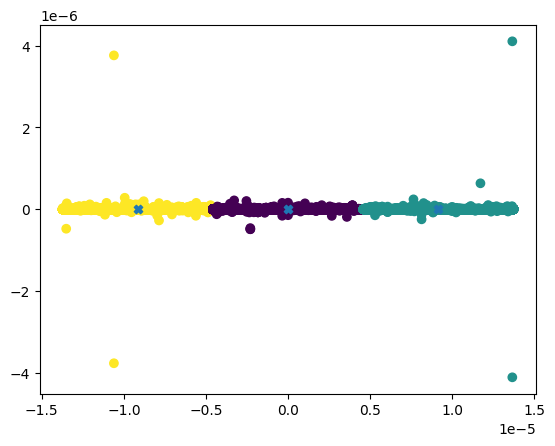

In [45]:
plot_cluster(X, model._centroids,  model._labels)

## Evaluating our model

Let's first see the data distribution in our clusters

In [47]:
def plot_distrib(model: KMeans):
    plot = sns.countplot(x=model._labels, palette='viridis')
    plot.set_title('Data distribution in the model')

C:\Users\sitia\AppData\Local\Temp\ipykernel_20652\3062721914.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x=model._labels, palette='viridis')


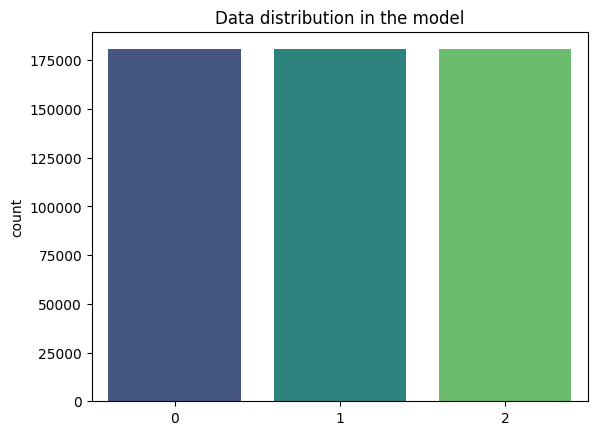

In [48]:
plot_distrib(model)

#### Elbow Method

Elbow method is essentially just finding the `k` value that lies between the significant value changes and the insignificant value changes

In [49]:
def elbow_method(X:np.ndarray, max_k=10):
    # Sum of Squared Distances (SSD) between each data points in each clusters
    ssd = list()
    
    for k in range(1, max_k + 1):
        test_model = KMeans(k)
        test_model.fit(X)
        ssd.append(test_model._inertia)
    
    plt.plot(range(1, max_k + 1), ssd, marker='o')
    plt.xlabel('Value of k')
    plt.ylabel('Sum of Squared Distances')
    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


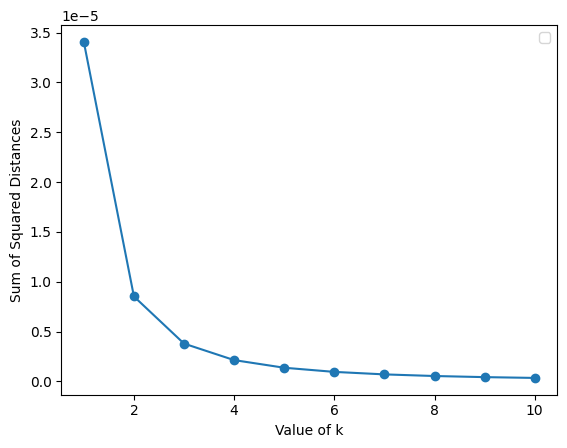

In [50]:
elbow_method(X)

So the optimal value for `k` is 3